In [66]:
# Importing necessary libraries
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns

from prettytable import PrettyTable
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [67]:
class Perceptron():
  def __init__(self, learning_rate, bias, weights, function):
    self.learning_rate = learning_rate
    self.bias = bias
    self.weights = weights
    self.function = function
    self.epochs = {}

  def __str__(self):
    return f'Rosenblat Perceptron, Bias: {self.bias}, Learning Rate: {self.learning_rate}, Weights: {self.weights}, Epochs: {self.epochs}'

  def epoch(self, data):
    adjusts = 0
    for x1, x2, y in data:
      X = np.array([self.bias, x1, x2])
      pred_y = self.function(np.dot(X, self.weights))
      error = y - pred_y
      if error != 0:
        adjusts += 1
      self.weights = self.weights + (self.learning_rate * error * X)

    return adjusts

  def converge(self, data, max_epochs = 100):
    for i in range(1, max_epochs + 1):
      adjusts = self.epoch(data)
      self.epochs[i] = adjusts
      if adjusts == 0:
        break

  def plot(self, data, f):
    for x, y, _ in data:
      if y >= f(self.weights, x):
        plt.scatter(x, y, s=10, marker='o', color='blue')

      else:
        plt.scatter(x, y, s=10, marker='o', color='red')


    x = [x[0] for x in data]
    x_line = np.arange(min(x) - 1, max(x) + 1, 0.1)
    plt.plot(x_line, f(self.weights, x_line), color='black', linestyle='-', label='Separating Line')

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


In [68]:
# Ensuring results are reproducible
random.seed(1)

In [69]:
# Activation Functiom
def step_function(n):
  if n >= 0:
    return 1

  else:
    return 0

# Finding the function that separates a problem
# x2 = (w0/w2) - (w1/w2)x1
def f(weights, x):
  w0, w1, w2 = weights
  return (w0/w2) - (w1/w2) * x

# **Section 1 - Solving a Linearly Separable Problem**

In this part, all teams must use the dataAll.txt file and implement the Perceptron neuron training algorithm to solve the proposed classification problem. The following requirements must be met:

* Use the step function with θ = 0 for activation.

* Set the learning rate (eta) to 0.1.

* Initialize the weight vector with random values between -0.5 and 0.5 (uniform distribution). Print these initial weights at the beginning of the algorithm execution.

* For each epoch, display the number of weight updates performed.

* Train the algorithm until convergence (no errors on the training data).

Upon convergence, print the following:

a) Total number of weight updates.

b) Number of epochs until convergence.

c) Plot containing all data points and the class separation line obtained from Perceptron neuron training. Follow the specified color scheme and present the solution clearly in the graph.

In [70]:
# Perceptron test
perceptron_test = Perceptron(0.1, -1, [-0.5441, 0.5562, -0.4074], step_function)
perceptron_test.converge([(2, 2, 1), (4, 4, 0)])
print(perceptron_test)

print(f'Number of adjusts: {sum(perceptron_test.epochs.values())}')
print(f'Number of epochs: {max(perceptron_test.epochs.keys())}')

Rosenblat Perceptron, Bias: -1, Learning Rate: 0.1, Weights: [-0.5441  0.3562 -0.6074], Epochs: {1: 1, 2: 1, 3: 0}
Number of adjusts: 2
Number of epochs: 3


In [71]:
# Initial settings
learning_rate = 0.1
bias = -1
weights = np.array([random.uniform(-0.5, 0.5) for _ in range(3)])
print(weights)

[-0.36563576  0.34743374  0.26377462]


In [72]:
# Extracting data
dt = np.dtype([('x1', float),
               ('x2', float),
               ('y', float)])
data = np.fromfile('Dados\dataAll.txt', dtype=dt).tolist()
print(data)
print(len(data))


[(-363.7884, 244.1423, 0.0), (328.7572, -256.7658, 1.0), (-164.9827, 613.2164, 0.0), (536.5905, 764.9575, 0.0), (314.2297, 343.8375, 0.0), (-87.6395, -306.9783, 1.0), (-172.0622, -500.5087, 1.0), (727.9602, 358.2956, 1.0), (752.3574, 268.3682, 1.0), (685.6276, -833.4677, 1.0), (11.5324, -588.4802, 1.0), (-925.9171, 924.6059, 0.0), (176.9271, 631.7058, 0.0), (835.2961, 991.2583, 0.0), (-49.2427, -170.8828, 1.0), (-491.8686, -166.2873, 0.0), (-757.4591, 66.6746, 0.0), (-501.2944, -33.3836, 0.0), (825.987, 798.5583, 1.0), (495.6894, -346.1624, 1.0), (525.8853, -986.6906, 1.0), (-967.347, -366.9538, 0.0), (-882.0782, -639.5238, 0.0), (-994.3367, 580.7919, 0.0), (-755.1501, 862.7146, 0.0), (-530.9124, -292.3363, 0.0), (-58.4576, 782.9459, 0.0), (737.8897, -169.5231, 1.0), (568.0743, -774.684, 1.0), (-650.3189, -540.3606, 0.0), (915.0113, -450.4835, 1.0), (400.0891, 778.9269, 0.0), (980.8324, 483.986, 1.0), (-8.8986, -216.2615, 1.0), (394.4734, -909.8338, 1.0), (559.5578, 51.0393, 1.0), (769

In [73]:
# Creating a new perceptron
perceptron = Perceptron(learning_rate, bias, weights, step_function)
print(perceptron)

Rosenblat Perceptron, Bias: -1, Learning Rate: 0.1, Weights: [-0.36563576  0.34743374  0.26377462], Epochs: {}


In [74]:
perceptron.converge(data)
print(perceptron)

print(f'Number of adjusts: {sum(perceptron.epochs.values())}')
print(f'Number of epochs: {max(perceptron.epochs.keys())}')

Rosenblat Perceptron, Bias: -1, Learning Rate: 0.1, Weights: [ 2.34364244e-01  3.37290524e+02 -3.37178725e+02], Epochs: {1: 47, 2: 11, 3: 0}
Number of adjusts: 58
Number of epochs: 3


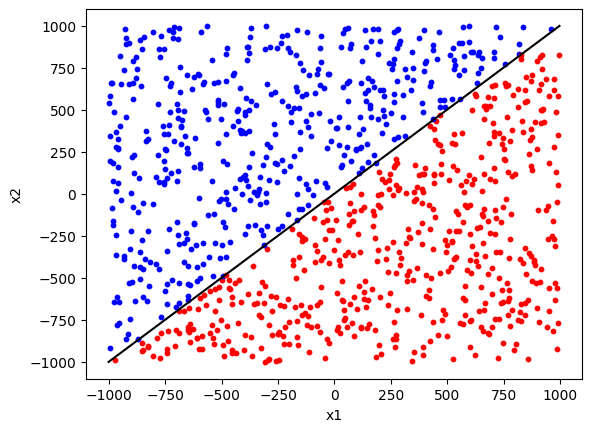

In [75]:
perceptron.plot(data, f)

# **Section 2 - Experimentation**

In this second part, each team will use their respective example identifier to work with a specific file. For instance, if a team has identifier 3, they should consider the data3.txt file.

The team should utilize the algorithm developed in Part I and perform 10 repetitions of it for the following configurations: η×I = {0.4, 0.1, 0.01}× {(−100,+ 100),(−0.5,+ 0.5)} where I is the interval to be used for the uniform distribution of the weights' values. Thus, there are 6 configurations to be tested, each one with 10 repetitions.

For each configuration, a single graph should be presented containing the inputs and the obtained solution, to show that all configurations, even though distinct, lead to convergence. The graph to be shown can contain the line resulting from the last repetition, for example. It is important to follow the illustration suggestions previously indicated.

For each configuration in its 10 executions, obtain the mean and standard deviation of the number of adjustments made to the weight vector and the minimum number of epochs until convergence in these 10 iterations. Arrange these results in the form of a table and discuss whether there is a better or worse configuration than the others or if they are equivalent. A suggested structure for this table is provided below, which has been filled with fictitious data. It is recommended to use the prettytable package in the notebook.

In [76]:
# Extracting data
data1 = np.fromfile('Dados\data1.txt', dtype=dt).tolist()
print(data1)
print(len(data1))

[(0.13658686541887297, -0.16460087815926505, 0.0), (-0.022855896990431154, -0.010946844491693888, 0.0), (-0.026548972487325385, 0.005821827440526004, 0.0), (0.07457415627738953, 0.0650316975470979, 0.0), (-0.012769752025793203, -0.07384375252259509, 0.0), (-0.12726003677075257, -0.07634221581637145, 0.0), (0.10788235573976308, -0.12570373831637302, 0.0), (0.007302600779362168, 0.02487588114697229, 0.0), (0.1578654558216854, 0.0739367056042825, 0.0), (0.12837720588262932, 0.05681431141247038, 0.0), (0.11086316142396564, -0.029504596603695282, 0.0), (0.052987251289162055, -0.18720529614115075, 0.0), (-0.15625740431688653, 0.01237468492464781, 0.0), (-0.08433268082999078, 0.15177186787124672, 0.0), (-0.1400253100177713, -0.05583387781218583, 0.0), (0.09276536375383515, 0.05453816492781649, 0.0), (-0.24517322429083094, 0.07339676776494157, 0.0), (-0.08489042978053143, -0.15249602090232617, 0.0), (-0.13115850228136394, 0.07307585969046149, 0.0), (0.12015010609349547, -0.11792732188498521, 0

In [77]:
# Creating perceptrons for experimentation
learning_rates = [0.4, 0.1, 0.01]
intervals = [(-100, 100), (-0.5, 0.5)]
bias = -1

# Number of repetitions
n = 10

perceptrons = []

for learning_rate in learning_rates:
  for interval in intervals:
    configuration = []

    for i in range(1, n + 1):
      random.seed(i)
      weights = np.array([random.uniform(interval[0], interval[1]) for _ in range(3)])
      perceptron = Perceptron(learning_rate, bias, weights, step_function)
      perceptron.converge(data1)
      configuration.append(perceptron)

    perceptrons.append(configuration)

Configuration 1
Learning Rate: 0.4
Weights: [14.68051894  8.26734155  9.99038909]


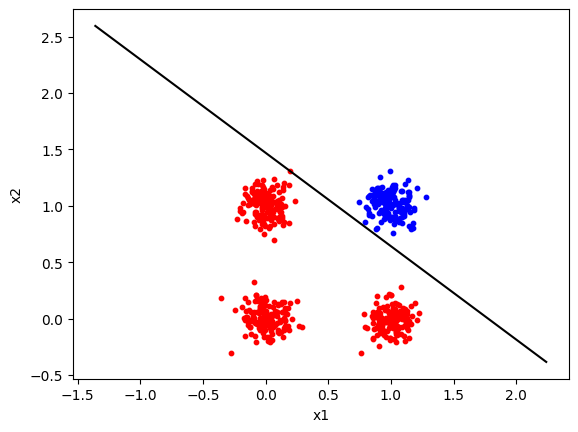





Configuration 2
Learning Rate: 0.4
Weights: [2.07140259 1.608466   0.93383109]


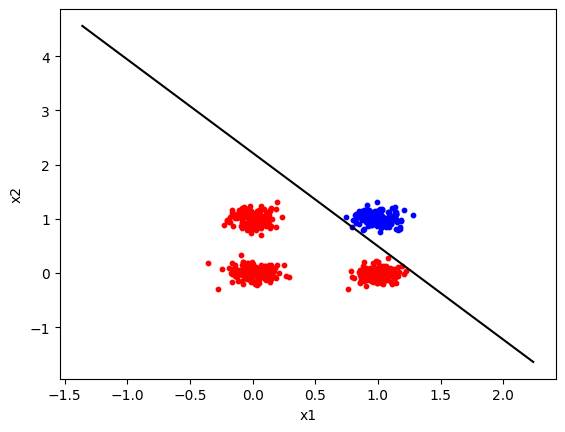





Configuration 3
Learning Rate: 0.1
Weights: [14.78051894  7.76347762 10.13787481]


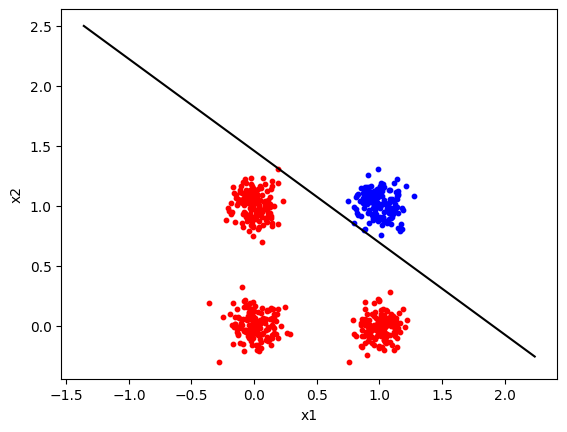





Configuration 4
Learning Rate: 0.1
Weights: [0.67140259 0.51297265 0.38002944]


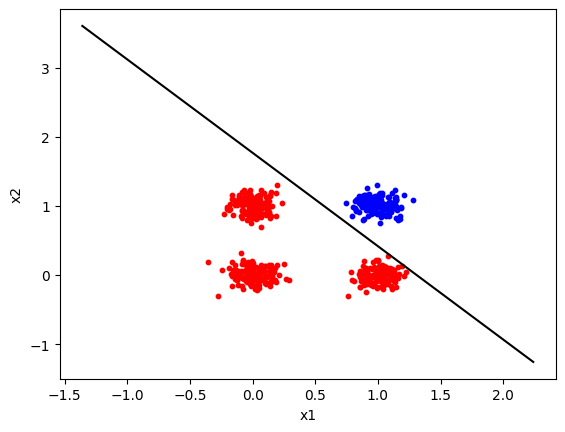





Configuration 5
Learning Rate: 0.01
Weights: [15.02051894  6.33798555 11.68867321]


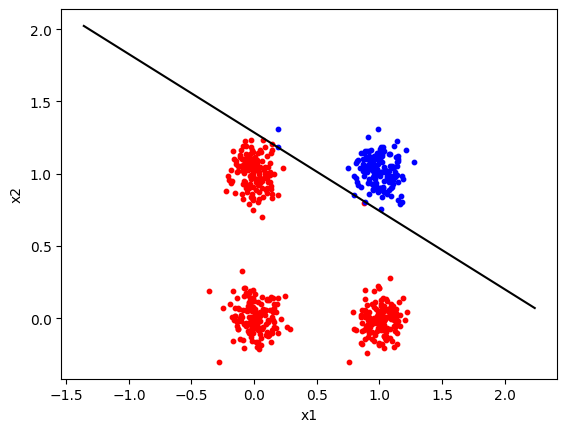





Configuration 6
Learning Rate: 0.01
Weights: [0.08140259 0.05853848 0.04171943]


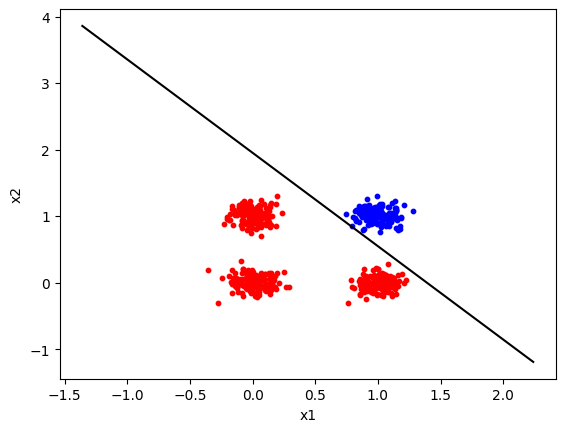

In [78]:
# Plotting for each configuration
n_configurations = len(learning_rates) * len(intervals)

for i in range(n_configurations):
  perc = perceptrons[i][-1]
  print(f"Configuration {i + 1}")
  print(f"Learning Rate: {perc.learning_rate}")
  print(f"Weights: {perc.weights}")
  perc.plot(data1, f)
  print("\n\n\n")


In [79]:
table = PrettyTable(["Learning Rate", "Weights Interval", "Number of Adjusts", "Minimum number of epochs for convergence"])

for i in range(n_configurations):
  perc = perceptrons[i]
  learning_rate = perc[-1].learning_rate
  interval = intervals[0] if i % 2 == 0 else intervals[1]
  adjusts = [sum(perceptron.epochs.values()) for perceptron in perc]
  epochs = [max(perceptron.epochs.keys()) for perceptron in perc]
  table.add_row([f"{learning_rate}", f"{interval}", f"{np.mean(adjusts)} {chr(0x00B1)} {np.std(adjusts):.2f}", f"{min(epochs)}"])
print(adjusts)

print(table)

[75, 130, 82, 133, 15, 39, 114, 152, 82, 27]
+---------------+------------------+-------------------+------------------------------------------+
| Learning Rate | Weights Interval | Number of Adjusts | Minimum number of epochs for convergence |
+---------------+------------------+-------------------+------------------------------------------+
|      0.4      |   (-100, 100)    |   396.3 ± 216.36  |                    3                     |
|      0.4      |   (-0.5, 0.5)    |    41.1 ± 12.04   |                    9                     |
|      0.1      |   (-100, 100)    |  1489.8 ± 817.88  |                    10                    |
|      0.1      |   (-0.5, 0.5)    |    42.5 ± 18.71   |                    5                     |
|      0.01     |   (-100, 100)    | 13394.5 ± 7322.41 |                    47                    |
|      0.01     |   (-0.5, 0.5)    |    84.9 ± 44.90   |                    2                     |
+---------------+------------------+-------------------

# **Section 3 - Holdout Validation for a Non-Linearly Separable Problem**

1. Visualize Non-Separability:
* Use the dataHoldout.txt file.
* Create an initial graph that demonstrates the non-linear separability of the data.


2. Randomly divide the examples into two partitions:
* Training set (70%)
* Testing set (30%)


3. Perceptron Training:

* Train a Perceptron neuron using the training set.
* Activation function: Step function with θ = 0.
* Learning rate (η) and weight initialization values should follow literature recommendations.
* Randomly initialize weights from U(−0.5,+0.5).
* Run the algorithm for 100 epochs.
* For each epoch, present the training set examples in random order.

4. Testing and Evaluation:

* Predict the output of the trained Perceptron neuron for all testing set examples.
* Compare the predicted outputs to the desired outputs.

In [80]:
# Extracting data
data_holdout = np.fromfile('Dados\dataHoldout.txt', dtype=dt).tolist()
print(data_holdout)
print(len(data_holdout))

[(-0.2932295873131307, -0.09065358981762574, 1.0), (0.07988839286317016, 0.21101296707007014, 1.0), (-0.07825562613996362, -0.08083512153854545, 1.0), (-0.46833414086087005, -0.1062072168208198, 1.0), (0.46304141710797525, 0.0940547076701862, 1.0), (0.011499804310926717, -0.05939114462951792, 1.0), (0.2723827411115975, 0.18359396977762452, 1.0), (0.08690973719604145, 0.0065449301967773835, 1.0), (0.08241920127479785, 0.0010660616735596266, 1.0), (-0.009401280219082942, -0.10654840909026392, 1.0), (0.05786482978974894, -0.36451413953575607, 1.0), (0.07028775298034035, 0.39056304860347146, 1.0), (0.20013586298555597, -0.41657686369114155, 1.0), (-0.06282732702084902, -0.32877261090946047, 1.0), (-0.10391517511724771, 0.3463819190984503, 1.0), (0.2552741944791023, 0.1717158690871203, 1.0), (0.2838286574002353, -0.006892018873374258, 1.0), (0.340156353455147, 0.06961302103664434, 1.0), (-0.1990883488567124, 0.12926357753514925, 1.0), (-0.031972368139656634, 0.16450965921936225, 1.0), (-0.0

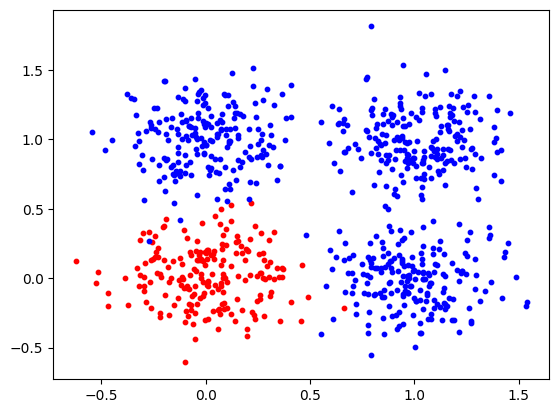

In [81]:
# Create an initial graph that demonstrates the non-linear separability of the data.

for x1, x2, y in data_holdout:
  if y == 0:
    plt.scatter(x1, x2, s=10, marker='o', color='blue')

  else:
    plt.scatter(x1, x2, s=10, marker='o', color='red')

plt.show()

In [82]:
# Splitting the data

test_size = 0.3
random.shuffle(data_holdout)
test_size = int(len(data_holdout) * test_size)

data_train = data_holdout[:-test_size]
data_test = data_holdout[-test_size:]

In [83]:
# Creating new perceptron

random.seed(23)
weights = np.array([random.uniform(-0.5, 0.5) for _ in range(3)])

perceptron_holdout = Perceptron(0.1, -1, weights, step_function)
perceptron_holdout.converge(data_train)
print(perceptron_holdout)

print(f'Number of adjusts: {sum(perceptron_holdout.epochs.values())}')
print(f'Number of epochs: {max(perceptron_holdout.epochs.keys())}')


Rosenblat Perceptron, Bias: -1, Learning Rate: 0.1, Weights: [-0.27513475 -0.47997557 -0.4738006 ], Epochs: {1: 58, 2: 32, 3: 32, 4: 32, 5: 32, 6: 26, 7: 26, 8: 28, 9: 34, 10: 32, 11: 32, 12: 32, 13: 40, 14: 33, 15: 30, 16: 34, 17: 38, 18: 34, 19: 33, 20: 29, 21: 34, 22: 34, 23: 33, 24: 33, 25: 32, 26: 32, 27: 33, 28: 33, 29: 30, 30: 32, 31: 32, 32: 33, 33: 29, 34: 33, 35: 33, 36: 32, 37: 32, 38: 33, 39: 33, 40: 32, 41: 30, 42: 38, 43: 34, 44: 33, 45: 29, 46: 34, 47: 34, 48: 33, 49: 33, 50: 30, 51: 34, 52: 30, 53: 33, 54: 35, 55: 33, 56: 32, 57: 30, 58: 33, 59: 30, 60: 34, 61: 30, 62: 33, 63: 35, 64: 33, 65: 32, 66: 33, 67: 33, 68: 33, 69: 30, 70: 34, 71: 30, 72: 33, 73: 35, 74: 33, 75: 32, 76: 33, 77: 33, 78: 33, 79: 30, 80: 34, 81: 30, 82: 33, 83: 35, 84: 33, 85: 32, 86: 30, 87: 33, 88: 30, 89: 34, 90: 30, 91: 33, 92: 35, 93: 31, 94: 31, 95: 34, 96: 33, 97: 33, 98: 30, 99: 34, 100: 34}
Number of adjusts: 3267
Number of epochs: 100


In [84]:
# Comparing results

y_test = [y[2] for y in data_test]
y_pred = []

for x1, x2, y in data_test:
  X = np.array([perceptron_holdout.bias, x1, x2])
  y_pred.append(perceptron_holdout.function(np.dot(X, perceptron_holdout.weights)))

print(f"Accuracy: {np.mean(np.array(y_test) == np.array(y_pred)) * 100}%")

print(classification_report(y_test, y_pred))

Accuracy: 95.0%
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97       184
         1.0       0.83      0.98      0.90        56

    accuracy                           0.95       240
   macro avg       0.91      0.96      0.93       240
weighted avg       0.96      0.95      0.95       240



<Axes: >

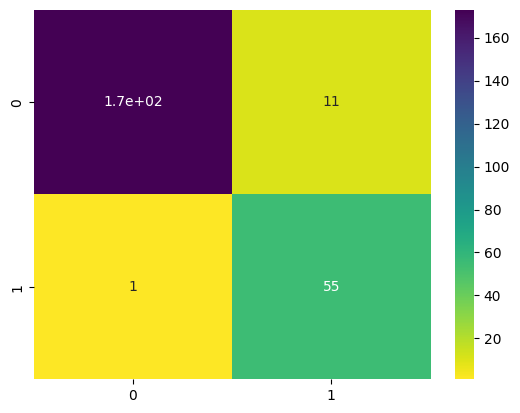

In [85]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='viridis_r')

The Perceptron achieves high accuracy and satisfactory outcomes even without perfect problem isolation.

In [86]:
def plot(data, perceptron):
  for x1, x2, y in data:
    if y == 0:
      plt.scatter(x1, x2, s=10, marker='o', color='blue')

    else:
      plt.scatter(x1, x2, s=10, marker='o', color='red')

  x = [x[0] for x in data]
  x_line = np.arange(min(x) - 1, max(x) + 1, 0.1)
  plt.plot(x_line, f(perceptron.weights, x_line), color='black', linestyle='-', label='Separating Line')

  plt.xlabel("x1")
  plt.ylabel("x2")
  plt.show()

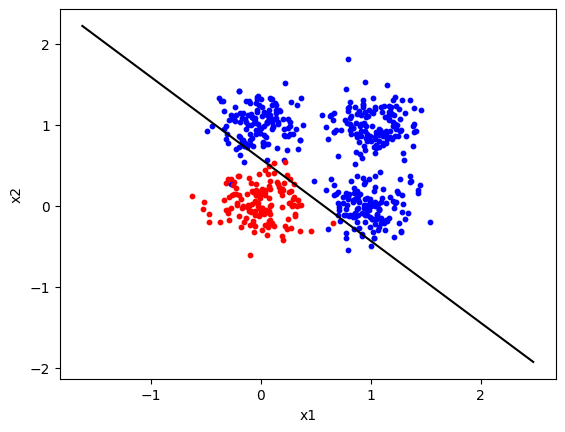

In [87]:
# Train data plot

plot(data_train, perceptron_holdout)

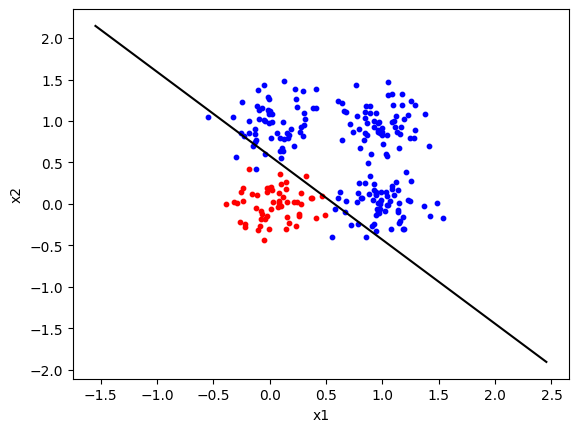

In [88]:
# Test data plot

plot(data_test, perceptron_holdout)